# Topic Modeling을 통한 강의평 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# load libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from utils import *

In [3]:
# load dataset
data = pd.read_csv('../data/2020LectureReview.csv', index_col=0)

In [4]:
# make before/after COVID-19 column
data['COVID-19'] = data['ReviewSemester'].apply(lambda x: 'before' if x not in ['20년 1학기 수강자', '20년 2학기 수강자'] else 'after')

In [5]:
data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after


## Task1 : 전체 강의평에 대하여 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [6]:
data_, text_tokenized_ = Preprocessor(data, list(data['ReviewText'].values))
data_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37


### Topic Modeling (LDA)

In [7]:
# topic modeling => topic list
print('============ Topic List ============')
corpus_, lda_ = ModelingLDA(text_tokenized_)

============ Topic List ============
(0, '0.101*"수강" + 0.039*"신청" + 0.032*"숙제" + 0.031*"물리" + 0.029*"학점"')
(1, '0.026*"사람" + 0.025*"모르" + 0.025*"그냥" + 0.021*"아니" + 0.015*"으면"')
(2, '0.063*"출석" + 0.047*"출결" + 0.030*"조교" + 0.017*"결석" + 0.014*"실험"')
(3, '0.049*"열심히" + 0.049*"공부" + 0.035*"시험" + 0.032*"학점" + 0.024*"생각"')
(4, '0.080*"학기" + 0.058*"최고" + 0.030*"재밌" + 0.027*"학점" + 0.026*"ㅎㅎ"')
(5, '0.054*"설명" + 0.044*"이해" + 0.043*"질문" + 0.029*"친절" + 0.017*"진도"')
(6, '0.024*"학년" + 0.017*"당신" + 0.016*"타과" + 0.016*"등록금" + 0.014*"아깝"')
(7, '0.095*"학생" + 0.022*"리딩" + 0.020*"흥미" + 0.017*"노력" + 0.016*"배려"')
(8, '0.084*"영어" + 0.053*"ㅋㅋ" + 0.043*"ㅋㅋㅋ" + 0.019*"그래도" + 0.014*"근데"')
(9, '0.049*"기말고사" + 0.046*"시간" + 0.039*"시험" + 0.038*"중간고사" + 0.028*"보고서"')
(10, '0.107*"문제" + 0.100*"시험" + 0.031*"공부" + 0.026*"족보" + 0.023*"나오"')
(11, '0.034*"생각" + 0.028*"학기" + 0.013*"진행" + 0.012*"수강" + 0.012*"학생"')
(12, '0.048*"과제" + 0.040*"기준" + 0.039*"성적" + 0.033*"평가" + 0.031*"점수"')
(13, '0.157*"과제" + 0.044*"학점" + 0.043*"시험

In [8]:
topic_table_ = MakeTopicTable(corpus_, lda_)

In [9]:
df_ = pd.concat([data_.reset_index(drop=True), topic_table_.reset_index(drop=True)], axis=1)
df_.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5,4,0.30754,"[(2, 0.20916927), (4, 0.30754256), (10, 0.1568..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20,1,0.23670,"[(0, 0.05002789), (1, 0.23669928), (7, 0.09566..."
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37,10,0.27493,"[(3, 0.1373029), (6, 0.02913044), (7, 0.118931..."
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8,10,0.39913,"[(7, 0.13534486), (10, 0.39912838), (14, 0.164..."
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37,13,0.29341,"[(9, 0.27222767), (10, 0.16813548), (13, 0.293..."


In [10]:
df_.to_csv('Task1_data_with_topic.csv')

In [11]:
before_df_ = df_[df_['COVID-19']=='before']
after_df_ = df_[df_['COVID-19']=='after']

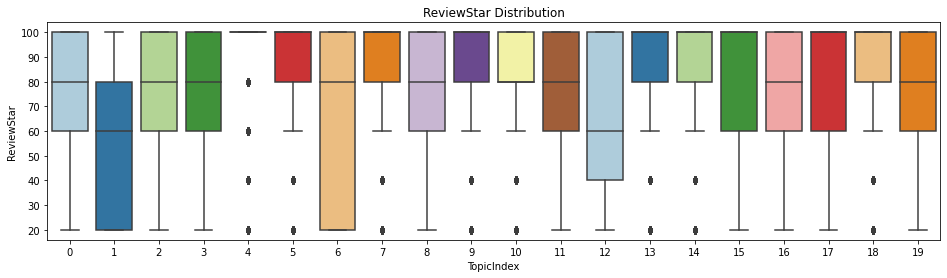

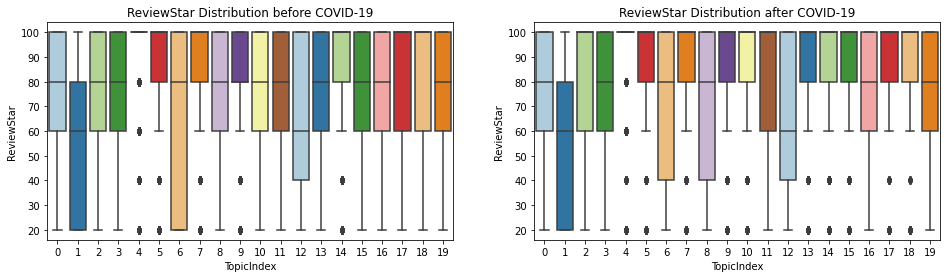

In [12]:
# ReviewStar Distribution

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

sns.boxplot(x='TopicIndex', y='ReviewStar', data=df_, palette='Paired')
plt.title('ReviewStar Distribution')

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df_, palette='Paired')
plt.title('ReviewStar Distribution before COVID-19')

plt.subplot(122)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df_, palette='Paired')
plt.title('ReviewStar Distribution after COVID-19')

plt.show()

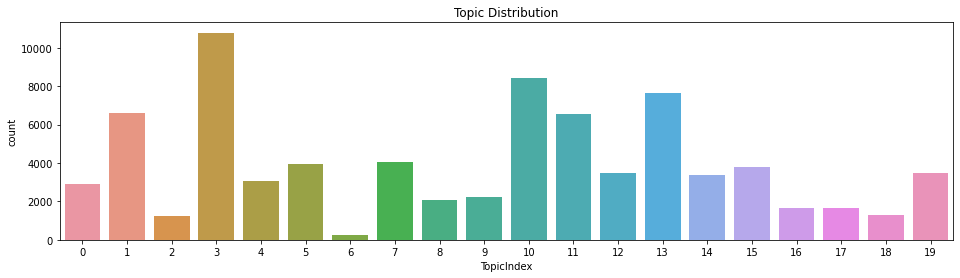

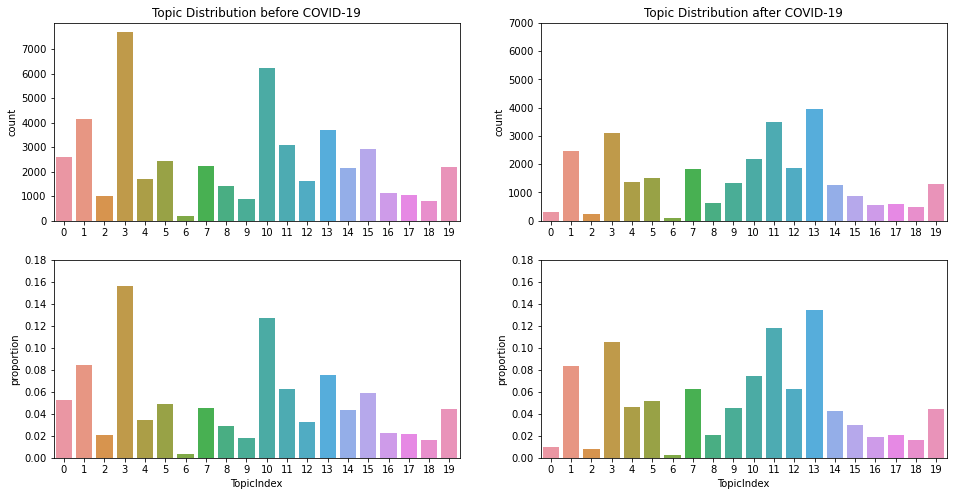

In [13]:
# Topic Distribution

before_temp_ = before_df_.groupby('TopicIndex').count()['LectureUrl']
after_temp_ = after_df_.groupby('TopicIndex').count()['LectureUrl']

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

sns.countplot(x=df_['TopicIndex'])
plt.title('Topic Distribution')

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

plt.subplot(221)
sns.countplot(x=before_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.xlabel('')
plt.title('Topic Distribution before COVID-19')

plt.subplot(222)
sns.countplot(x=after_df_['TopicIndex'])
plt.yticks(range(0, 7001, 1000))
plt.xlabel('')
plt.title('Topic Distribution after COVID-19')

plt.subplot(223)
sns.barplot(x=before_temp_.index, y=before_temp_.values/len(before_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.subplot(224)
sns.barplot(x=after_temp_.index, y=after_temp_.values/len(after_df_))
plt.yticks(np.arange(0, 0.20, 0.02))
plt.ylabel('proportion')

plt.show()

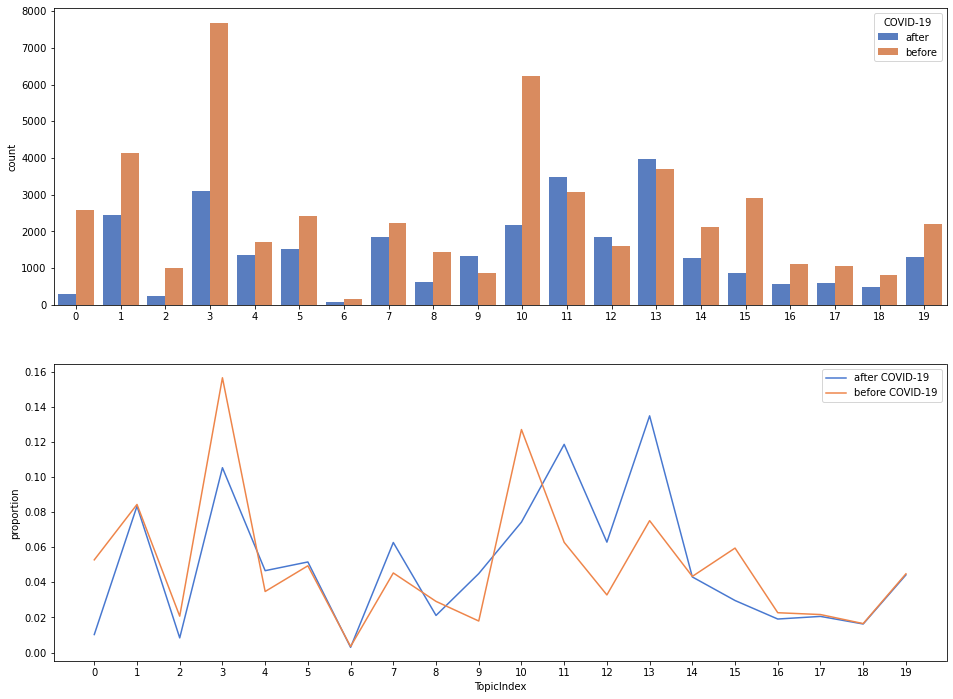

In [14]:
# Compare Topic Distribution before/after COVID19

fig, ax = plt.subplots(2, 1, figsize=(16, 12))

plt.subplot(211)
sns.countplot(x='TopicIndex', data=df_, hue='COVID-19', palette='muted')
plt.xticks(range(0, 20, 1))
plt.xlabel('')
plt.ylabel('count')

plt.subplot(212)
sns.lineplot(x=after_temp_.index, y=after_temp_.values/len(after_df_), label='after COVID-19', color=sns.color_palette('muted')[0])
sns.lineplot(x=before_temp_.index, y=before_temp_.values/len(before_df_), label='before COVID-19', color=sns.color_palette('muted')[1])
plt.xticks(range(0, 20, 1))
plt.ylabel('proportion')

plt.show()

## Task2 : 코로나 전/후 강의평에 대하여 각각 토픽 모델링 진행 후 코로나 전/후 강의평 토픽 비교

### Preprocessing

In [15]:
before_data = data[data['COVID-19']=='before']
after_data = data[data['COVID-19']=='after']

In [16]:
before_text = list(before_data['ReviewText'].values)
after_text = list(after_data['ReviewText'].values)

In [17]:
before_data, before_text_tokenized = Preprocessor(before_data, before_text)
after_data, after_text_tokenized = Preprocessor(after_data, after_text)

In [18]:
before_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
2,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37
3,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8
6,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,12
7,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 주심 성적 그냥 시험 갈리 모임 빡세 자주 만나 조원 만나 헤쳐 나...,48
16,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,학구 은데 마이너스 폭격기,4


In [19]:
after_data.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20
4,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37
5,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 건지 맨날 올라옴 시간 니까 열정 초반 부터 사라짐 그러 저작 일찍 내려...,17
8,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 가장 하나 학생 배려 필요 학생 감상 이나 해석 개입 참고 배경 지식 작가 의...,47


### EDA

In [20]:
# Number of Texts & tokens

before_counter = Counter(sum(before_text_tokenized, []))
after_counter = Counter(sum(after_text_tokenized, []))

print('COVID-19 이전 전체 강의평 개수: {}개'.format(len(before_text)))
print('COVID-19 이후 전체 강의평 개수: {}개'.format(len(after_text)))

print('COVID-19 이전 전체 토큰 개수: {}개'.format(len(before_counter)))
print('COVID-19 이후 전체 토큰 개수: {}개'.format(len(after_counter)))

COVID-19 이전 전체 강의평 개수: 49127개
COVID-19 이후 전체 강의평 개수: 29423개
COVID-19 이전 전체 토큰 개수: 26348개
COVID-19 이후 전체 토큰 개수: 19991개


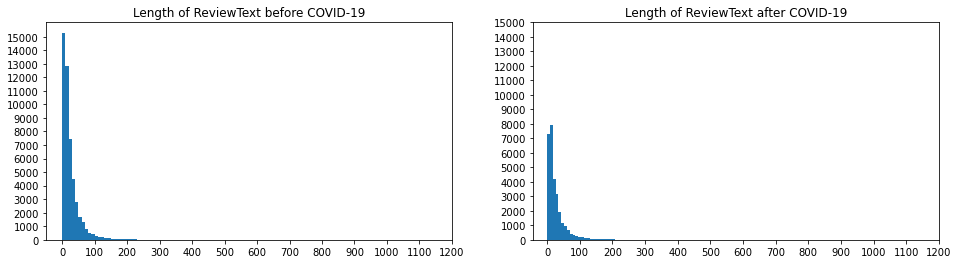

In [21]:
# Length of Texts

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'], bins=100)
plt.xticks(range(0, 1201, 100))
plt.yticks(range(0, 15001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

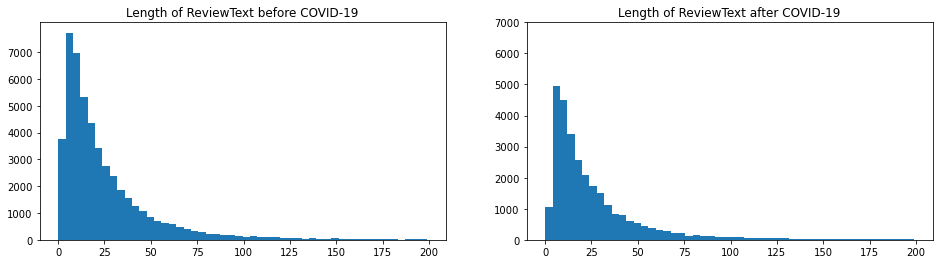

In [22]:
# Length of Texts (zoom-in)

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
plt.hist(before_data['TokenCnt'][before_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText before COVID-19')

plt.subplot(122)
plt.hist(after_data['TokenCnt'][after_data['TokenCnt']<200], bins=50)
plt.xticks(range(0, 201, 25))
plt.yticks(range(0, 7001, 1000))
plt.title('Length of ReviewText after COVID-19')

plt.show()

### Topic Modeling (LDA)

In [23]:
print('========== Topic List before COVID-19 ==========')
before_corpus, before_lda = ModelingLDA(before_text_tokenized)
print()
print('========== Topic List after COVID-19 ==========')
after_corpus, after_lda = ModelingLDA(after_text_tokenized)

========== Topic List before COVID-19 ==========
(0, '0.038*"문과" + 0.024*"송도" + 0.023*"과학" + 0.017*"ㅜㅜ" + 0.015*"고등학교"')
(1, '0.125*"문제" + 0.120*"시험" + 0.032*"과제" + 0.032*"어렵" + 0.025*"나오"')
(2, '0.165*"최고" + 0.118*"리딩" + 0.046*"물리" + 0.029*"젠틀" + 0.024*"분반"')
(3, '0.044*"문제" + 0.038*"시험" + 0.019*"시간" + 0.018*"점수" + 0.018*"중간고사"')
(4, '0.172*"영어" + 0.111*"ㅋㅋ" + 0.089*"ㅋㅋㅋ" + 0.023*"영강" + 0.023*"발음"')
(5, '0.085*"족보" + 0.043*"그냥" + 0.034*"시험" + 0.025*"공부" + 0.020*"독학"')
(6, '0.062*"모임" + 0.041*"과제" + 0.027*"학기" + 0.023*"만나" + 0.022*"조원"')
(7, '0.195*"ㅎㅎ" + 0.106*"착하" + 0.061*"제발" + 0.059*"귀여우" + 0.041*"너무너무"')
(8, '0.038*"설명" + 0.037*"질문" + 0.032*"이해" + 0.024*"시간" + 0.021*"친절"')
(9, '0.132*"학생" + 0.032*"열정" + 0.022*"주심" + 0.019*"노력" + 0.017*"배려"')
(10, '0.054*"추천" + 0.053*"과목" + 0.047*"학점" + 0.029*"수강" + 0.028*"배우"')
(11, '0.072*"중간" + 0.064*"기말" + 0.046*"퀴즈" + 0.044*"과제" + 0.036*"성적"')
(12, '0.077*"출석" + 0.046*"출결" + 0.017*"결석" + 0.017*"부르" + 0.016*"지각"')
(13, '0.075*"과제" + 0.063*"발표" 

In [24]:
before_topic_table = MakeTopicTable(before_corpus, before_lda)
after_topic_table = MakeTopicTable(after_corpus, after_lda)

In [25]:
before_df = pd.concat([before_data.reset_index(drop=True), before_topic_table.reset_index(drop=True)], axis=1)
after_df = pd.concat([after_data.reset_index(drop=True), after_topic_table.reset_index(drop=True)], axis=1)

In [26]:
before_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,19년 1학기 수강자,한국은행 금융통화위원을 지내고 오신 교수님이시라 그런지 간간히 들려주시는 교수님의 ...,before,한국은행 금융 통화 위원 지내 그런지 간간히 들려 현장 쏠쏠 재미 중간고사 기말고사...,37,15,0.42923,"[(3, 0.14941701), (5, 0.03939199), (8, 0.07600..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,19년 1학기 수강자,교수님 너무 똑똑하시고 피피티 위주로 수업하시기는 하는데 현장경험이 풍부하셔서 그런...,before,똑똑 피피티 위주 현장 경험 풍부 그런지 설명,8,15,0.39990,"[(2, 0.11671776), (15, 0.39989832), (16, 0.388..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,18년 2학기 수강자,교수님의 수업은 이해하기 쉬웠고 질적연구와 현장연구에 대해 잘 설명해주셔서 수업은 ...,before,이해 쉬웠 연구 현장 연구 설명 중간고사 비중 성적 산출 아쉬운 부분,12,15,0.55430,"[(11, 0.37645757), (15, 0.5543027)]"
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,100.0,18년 2학기 수강자,개인적이지만 수업 괜찮았고 설명 잘해주심. 성적은 그냥 시험으로 갈리는듯? 조모임 ...,before,개인 괜찮 설명 주심 성적 그냥 시험 갈리 모임 빡세 자주 만나 조원 만나 헤쳐 나...,48,16,0.30697,"[(3, 0.19366269), (6, 0.27680615), (7, 0.06401..."
4,https://yonsei.everytime.kr/lecture/view/2073400,국제이해교육,이무성,40.0,19년 2학기 수강자,교수님 좋고 학구적이고 내용도 좋은데 마이너스 폭격기임^^,before,학구 은데 마이너스 폭격기,4,11,0.41011,"[(0, 0.010003326), (1, 0.010003326), (2, 0.010..."


In [27]:
after_df.head()

,LectureUrl,LectureName,LectureProf,ReviewStar,ReviewSemester,ReviewText,COVID-19,TextPreprocessed,TokenCnt,TopicIndex,TopicProportion,TopicList
0,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,100.0,20년 1학기 수강자,시험 잘 멋본 것 같은데 에이제로 떠서 놀람 감사합니다 교수님,after,시험 이제 떠서 놀람 감사,5,7,0.34154,"[(0, 0.22344877), (7, 0.34153807), (15, 0.1750..."
1,https://yonsei.everytime.kr/lecture/view/3640,INTERNATIONAL MONEY AND CAPITAL MARKETS,함준호,80.0,20년 1학기 수강자,"에 뭐,,, 그냥 괜찮았는데 자습기간을 안 주고 전범위 시험본다그러니까 당황스러웠네...",after,그냥 괜찮 자습 기간 범위 시험 본다 그러니까 당황 똑똑 나쁘 다만 시간 연속 힘들...,20,0,0.27530,"[(0, 0.27530342), (1, 0.16007057), (7, 0.17327..."
2,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,80.0,20년 1학기 수강자,매주 온라인 강의를 늦게 올려주셔서 불편했지만 수업 내용은 무난하고 좋았습니다. 매...,after,매주 온라인 올려 불편 무난 매주 출석 과제 기말 연구 보고서 기말 온라인 시험 이...,37,17,0.48280,"[(0, 0.2019097), (1, 0.14822762), (3, 0.074564..."
3,https://yonsei.everytime.kr/lecture/view/943471,학교교실의현장연구방법입문,박순용,20.0,20년 1학기 수강자,조교가 일을 안하는건지 교수가 일을 안하는건지 강의가 맨날 늦게 올라옴 제 시간에 ...,after,조교 건지 건지 맨날 올라옴 시간 니까 열정 초반 부터 사라짐 그러 저작 일찍 내려...,17,12,0.32183,"[(3, 0.29197127), (7, 0.28334722), (12, 0.3218..."
4,https://yonsei.everytime.kr/lecture/view/1600344,현대독일산문,이진영,100.0,20년 1학기 수강자,이번 학기에 들은 강의 중에 가장 좋았던 수업 중 하나. 교수님께서 학생들 많이 배...,after,학기 가장 하나 학생 배려 필요 학생 감상 이나 해석 개입 참고 배경 지식 작가 의...,47,19,0.68714,"[(11, 0.16457574), (14, 0.029316697), (15, 0.1..."


In [28]:
before_df.to_csv('Task2_data_before_COVID19_with_topic.csv')
after_df.to_csv('Task2_data_after_COVID19_with_topic.csv')

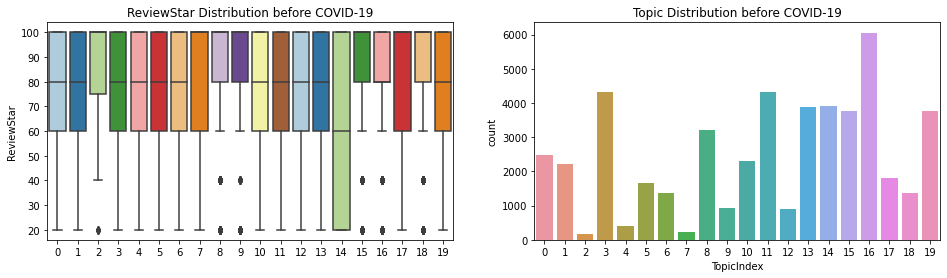

In [29]:
# Topic Distribution & ReviewStar Distribution before COVID-19

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=before_df, palette='Paired')
plt.xlabel('')
plt.title('ReviewStar Distribution before COVID-19')

plt.subplot(122)
sns.countplot(x=before_topic_table['TopicIndex'])
plt.title('Topic Distribution before COVID-19')

plt.show()

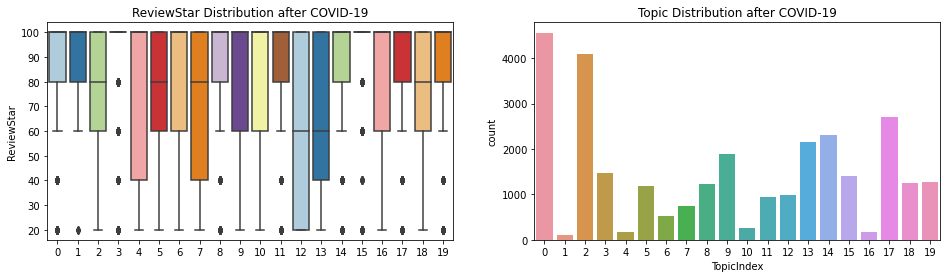

In [30]:
# Topic Distribution & ReviewStar Distribution after COVID-19

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plt.subplot(121)
sns.boxplot(x='TopicIndex', y='ReviewStar', data=after_df, palette='Paired')
plt.xlabel('')
plt.title('ReviewStar Distribution after COVID-19')

plt.subplot(122)
sns.countplot(x=after_topic_table['TopicIndex'])
plt.title('Topic Distribution after COVID-19')

plt.show()